In [53]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [146]:
spotify_df = pd.read_csv('data/preprocessed-reviews.csv')
corpus = pd.read_csv('data/spotify-reviews.csv')
spotify_df.head()

,review,rating,total_thumbs_up,replied,process_tok,comp_score,pos_score,neg_score,sentiment
0,"great music service, the audio is high quality...",5,2,0,"['great', 'music', 'service', 'audio', 'high',...",0.9211,0.436,0.000,pos
1,please ignore previous negative rating. this a...,5,1,0,"['please', 'ignore', 'previous', 'negative', '...",0.6249,0.404,0.243,pos
2,"this pop-up ""get the best spotify experience o...",4,0,0,"['get', 'best', 'spotify', 'experience', 'andr...",0.5859,0.258,0.107,pos
3,really buggy and terrible to use as of recently,1,1,0,"['really', 'buggy', 'terrible', 'use', 'recent...",-0.5209,0.000,0.296,neg
4,dear spotify why do i get songs that i didn't ...,1,1,0,"['dear', 'spotify', 'get', 'song', 'put', 'pla...",0.7149,0.260,0.000,pos


In [55]:
spotify_df1 = spotify_df.drop(columns=['process_tok'])
df = pd.concat([spotify_df1,corpus], axis=1)

In [59]:
pos_reviews = df[df.sentiment.isin(['pos'])]
neg_reviews = df[df.sentiment.isin(['neg'])]

In [299]:
pos_reviews.head()

,review,rating,total_thumbs_up,replied,comp_score,pos_score,neg_score,sentiment,process_tok
0,"great music service, the audio is high quality...",5,2,0,0.9211,0.436,0.000,pos,great music service audio high quality app eas...
1,please ignore previous negative rating. this a...,5,1,0,0.6249,0.404,0.243,pos,please ignore previous negative rating app sup...
2,"this pop-up ""get the best spotify experience o...",4,0,0,0.5859,0.258,0.107,pos,get best spotify experience android annoy plea...
4,dear spotify why do i get songs that i didn't ...,1,1,0,0.7149,0.260,0.000,pos,dear spotify get song put playlist shuffle play
6,i love the selection and the lyrics are provid...,5,0,0,0.6696,0.257,0.000,pos,love selection lyric provide song listening


C:\Users\Kevin\anaconda3\envs\spotify-proj\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


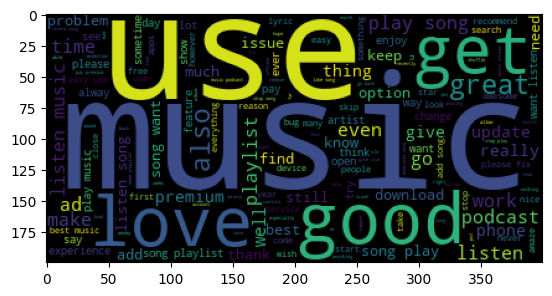

In [306]:
pos_text = ''.join(review for review in pos_reviews.process_tok)
wordcloud = WordCloud(stopwords=stop_words).generate(pos_text)

# displaying generated image 
plt.imshow(wordcloud)

In [300]:
neg_reviews.head()

,review,rating,total_thumbs_up,replied,comp_score,pos_score,neg_score,sentiment,process_tok
3,really buggy and terrible to use as of recently,1,1,0,-0.5209,0.000,0.296,neg,really buggy terrible use recently
5,the player controls sometimes disappear for no...,3,7,0,-0.1655,0.072,0.157,neg,player control sometimes disappear reason app ...
10,"love spotify, and usually this app is the best...",2,1,0,-0.8095,0.128,0.243,neg,love spotify usually app best others state con...
11,can't play spotify when on wifi,1,1,0,-0.2584,0.000,0.289,neg,play spotify wifi
13,worst app always says i'm offline and never sh...,1,1,0,-0.6808,0.000,0.337,neg,bad app always say offline never show song pod...


C:\Users\Kevin\anaconda3\envs\spotify-proj\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


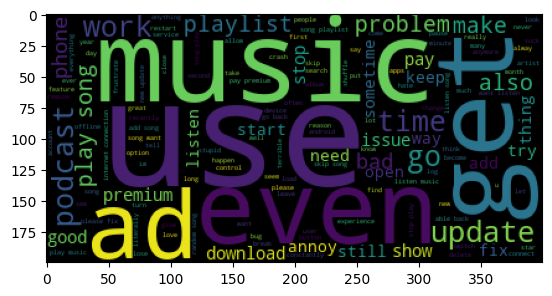

In [304]:
neg_text = ''.join(review for review in neg_reviews.process_tok)
wordcloud = WordCloud(stopwords=stop_words).generate(neg_text)

# displaying generated image 
plt.imshow(wordcloud)

In [161]:
from nltk.probability import FreqDist
from nltk.corpus import stopwords

C:\Users\Kevin\anaconda3\envs\spotify-proj\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


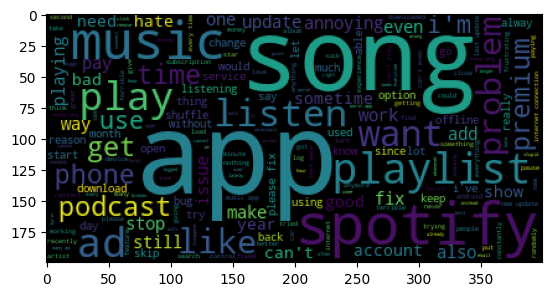

In [168]:
stop_words = stopwords.words('english')
text = ' '.join(review for review in neg_reviews.review)
wordcloud = WordCloud(stopwords=stop_words).generate(text)
plt.imshow(wordcloud)

In [171]:
new_stopwords = ['app','spotify']
stop_words.extend(new_stopwords)

In [192]:
import itertools

In [228]:
positive_reviews = spotify_df[spotify_df.sentiment.str.contains('pos')]
positive_reviews.process_tok[0]

"['great', 'music', 'service', 'audio', 'high', 'quality', 'app', 'easy', 'use', 'also', 'quick', 'friendly', 'support']"

In [234]:
# takes in untokenized document and returns fully normalized token list
def process_doc(doc):

    #initialize lemmatizer
    wnl = WordNetLemmatizer()

    # helper function to change nltk's part of speech tagging to a wordnet format.
    def pos_tagger(nltk_tag):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        else:         
            return None
        
    # remove stop words and punctuations, then lower case
    doc_norm = [tok.lower() for tok in word_tokenize(doc) if ((tok.isalpha()) & (tok.lower() not in stop_words)) ]

    #  POS detection on the result will be important in telling Wordnet's lemmatizer how to lemmatize
    
    # creates list of tuples with tokens and POS tags in wordnet format
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tag(doc_norm))) 
    doc_norm = [wnl.lemmatize(token, pos) for token, pos in wordnet_tagged if pos is not None]
    
    return doc_norm

In [240]:
#positive_reviews = positive_reviews.drop(columns = ['process_tok'])

In [246]:
from nltk import WordNetLemmatizer # lemmatizer using WordNet
from nltk.corpus import wordnet # imports WordNet
from nltk import pos_tag # nltk's native part of speech tagging
from nltk.tokenize import word_tokenize 

In [248]:
positive_reviews['processed body'] = positive_reviews.review.apply(process_doc)
positive_reviews

,review,rating,total_thumbs_up,replied,comp_score,pos_score,neg_score,sentiment,processed body
0,"great music service, the audio is high quality...",5,2,0,0.9211,0.436,0.000,pos,"[great, music, service, audio, high, quality, ..."
1,please ignore previous negative rating. this a...,5,1,0,0.6249,0.404,0.243,pos,"[please, ignore, previous, negative, rating, s..."
2,"this pop-up ""get the best spotify experience o...",4,0,0,0.5859,0.258,0.107,pos,"[get, best, experience, android, annoy, please..."
4,dear spotify why do i get songs that i didn't ...,1,1,0,0.7149,0.260,0.000,pos,"[dear, get, song, put, playlist, shuffle, play]"
6,i love the selection and the lyrics are provid...,5,0,0,0.6696,0.257,0.000,pos,"[love, selection, lyric, provide, song, listen..."
...,...,...,...,...,...,...,...,...,...
61582,it selects music based on your taste makes bes...,5,4,0,0.8591,0.302,0.000,pos,"[selects, music, base, taste, make, best, mix,..."
61584,keeps putting songs i've hidden in my suggeste...,1,37,0,0.4749,0.071,0.029,pos,"[keep, put, song, hide, suggested, song, liste..."
61590,"use to be sooo good back when i had it, and wh...",1,0,0,0.8481,0.227,0.069,pos,"[use, sooo, good, back, download, free, versio..."
61592,the app is good hard to navigate and won't jus...,2,1,0,0.8074,0.159,0.023,pos,"[good, hard, navigate, let, play, song, click,..."


In [250]:
pos_reviews_toks = pd.Series(list(itertools.chain(*positive_reviews['processed body'])))
pos_reviews_toks

0           great
1           music
2         service
3           audio
4            high
           ...   
518356     diesnt
518357       work
518358       time
518359       work
518360      great
Length: 518361, dtype: object

In [254]:
# frequency distribution of most common tokens in positive reviews 
fdist = FreqDist(pos_reviews_toks)
fdist.most_common(10)

[('song', 20728),
 ('music', 19155),
 ('play', 11905),
 ('love', 8681),
 ('listen', 8676),
 ('good', 8040),
 ('use', 7504),
 ('great', 6761),
 ('playlist', 6400),
 ('ad', 6042)]

C:\Users\Kevin\anaconda3\envs\spotify-proj\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


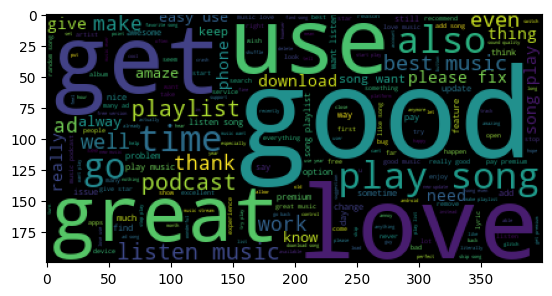

In [251]:
# word cloud for positive reviews 
text = ' '.join(review for review in pos_reviews_toks)
wordcloud = WordCloud(stopwords=stop_words).generate(text)
plt.imshow(wordcloud)

In [258]:
X_pos_vectorized = tfdif_vect.fit_transform(pos_reviews_toks)
pos_topic_model = NMF(n_components = 3)
pos_topic_model.fit(X_pos_vectorized)

NMF(n_components=3)

In [260]:
# to get H
H_pos = pos_topic_model.transform(X_pos_vectorized) # transform document into topic vector representation

# to get W 
W_pos = pos_topic_model.components_ # word component weights for each topic

In [268]:
for index,topic in enumerate(W_pos):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([tfdif_vect.get_feature_names_out()[i] for i in topic.argsort()[-25:]])
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['new', 'really', 'download', 'keep', 'give', 'time', 'easy', 'also', 'find', 'work', 'please', 'well', 'want', 'great', 'even', 'ad', 'good', 'best', 'premium', 'listen', 'playlist', 'get', 'use', 'love', 'song']


THE TOP 10 WORDS FOR TOPIC #1
['give', 'update', 'pay', 'easy', 'also', 'well', 'really', 'free', 'make', 'work', 'add', 'time', 'even', 'want', 'best', 'good', 'premium', 'listen', 'get', 'ad', 'playlist', 'great', 'use', 'love', 'music']


THE TOP 10 WORDS FOR TOPIC #2
['easy', 'free', 'well', 'fix', 'go', 'make', 'update', 'add', 'really', 'please', 'time', 'even', 'want', 'get', 'great', 'work', 'love', 'use', 'premium', 'good', 'ad', 'best', 'listen', 'playlist', 'play']




In [294]:
import pyLDAvis
from gensim.models import LdaModel

pyLDAvis.enable_notebook()
lda_model = LdaModel()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [274]:
%%capture topic_word_plot
def plot_top_words(W, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 3, figsize=(15, 8), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(W_pos):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 20})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=15)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=25)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 10
tfidf_feature_names = tfdif_vect.get_feature_names_out()
plot_top_words(W, tfidf_feature_names, n_top_words, "Topics in NMF model")

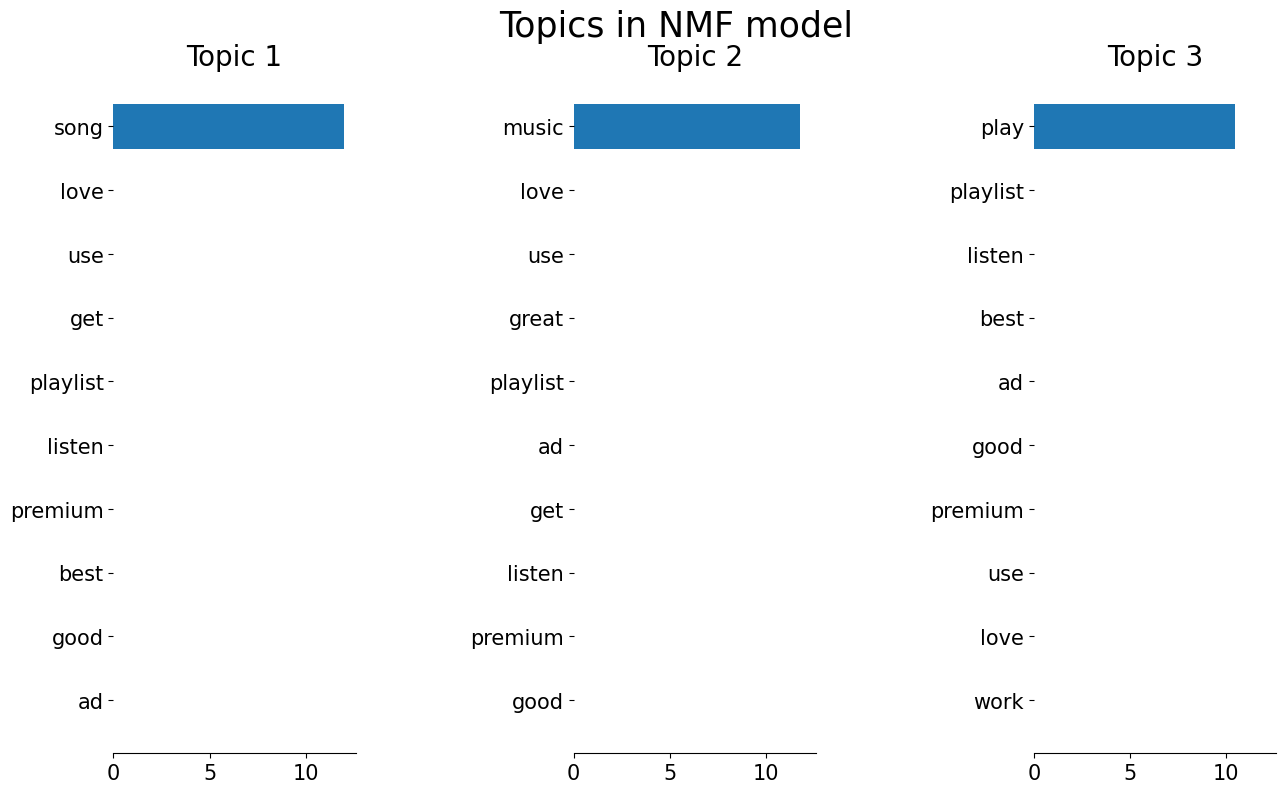

In [275]:
topic_word_plot()

## Vectorizing

In [141]:
#original datasets 
spotify_df
corpus

,process_tok
0,great music service audio high quality app eas...
1,please ignore previous negative rating app sup...
2,get best spotify experience android annoy plea...
3,really buggy terrible use recently
4,dear spotify get song put playlist shuffle play
...,...
61589,even communicate lyric feature available user ...
61590,use sooo good back download free version pick ...
61591,app good take device start comp spotify start ...
61592,app good hard navigate let play song click pla...


In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [145]:
corpus = corpus.dropna()
corpus.isna().sum()

process_tok    0
dtype: int64

In [106]:
tfdif_vect = TfidfVectorizer()
X_vectorized = tfdif_vect.fit_transform(corpus.process_tok)

vec_tfidf = pd.DataFrame(X_vectorized.toarray(), columns=tfdif_vect.get_feature_names_out())
vec_tfidf.head()

,aa,aaa,aaaaaaaa,aaaannndd,aaah,aaahh,aac,aad,aada,aads,...,𝚊𝚙𝚙,𝚎𝚟𝚎𝚛,𝚑𝚊𝚟𝚎,𝚒𝚜,𝚕𝚘𝚟𝚎𝚍,𝚖𝚘𝚜𝚝,𝚖𝚞𝚜𝚒𝚌,𝚝𝚑𝚎,𝚝𝚑𝚒𝚗𝚔,𝚝𝚑𝚒𝚜
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
vec_tfidf.iloc[312].sort_values(ascending=False)[:10]

variety          0.693369
excellent        0.671449
music            0.261525
prompts          0.000000
pronunciation    0.000000
properly         0.000000
proper           0.000000
propagate        0.000000
propaganda       0.000000
prop             0.000000
Name: 312, dtype: float64

In [120]:
spotify_df.review[312]

'excellent music variety.'

In [130]:
#modeling and dimensionality reduction for visuaization
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE

In [131]:
topic_model = NMF(n_components = 5)
topic_model.fit(X_vectorized)

NMF(n_components=5)

In [132]:
# to get H
H = topic_model.transform(X_vectorized) # transform document into topic vector representation

# to get W 
W = topic_model.components_ # word component weights for each topic

In [133]:
H

array([[0.        , 0.04496429, 0.        , 0.01152763, 0.01128467],
       [0.00022301, 0.0181601 , 0.0007941 , 0.01570044, 0.        ],
       [0.0024236 , 0.01741554, 0.01149088, 0.02889251, 0.01654859],
       ...,
       [0.00591983, 0.00662924, 0.00417211, 0.04540426, 0.00348327],
       [0.07897326, 0.        , 0.01079198, 0.01653228, 0.        ],
       [0.01436823, 0.02134039, 0.00046892, 0.04530019, 0.        ]])

In [135]:
for index,topic in enumerate(W):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([tfdif_vect.get_feature_names_out()[i] for i in topic.argsort()[-25:]])
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['click', 'pick', 'get', 'put', 'really', 'list', 'different', 'find', 'choose', 'search', 'let', 'hear', 'like', 'make', 'good', 'even', 'random', 'skip', 'shuffle', 'add', 'listen', 'want', 'playlist', 'play', 'song']


THE TOP 10 WORDS FOR TOPIC #1
['recommend', 'apps', 'sound', 'platform', 'podcast', 'amaze', 'excellent', 'really', 'experience', 'find', 'use', 'nice', 'podcasts', 'enjoy', 'easy', 'selection', 'quality', 'stream', 'ever', 'listen', 'good', 'great', 'best', 'app', 'music']


THE TOP 10 WORDS FOR TOPIC #2
['say', 'hate', 'buy', 'row', 'bad', 'less', 'come', 'app', 'really', 'star', 'listen', 'way', 'min', 'pay', 'lot', 'give', 'annoy', 'minute', 'free', 'premium', 'get', 'good', 'much', 'many', 'ad']


THE TOP 10 WORDS FOR TOPIC #3
['bar', 'open', 'problem', 'pause', 'try', 'show', 'spotify', 'pay', 'go', 'crash', 'even', 'issue', 'phone', 'get', 'premium', 'please', 'use', 'keep', 'time', 'fix', 'stop', 'work', 'update', 'play', 'app']



In [137]:
%%capture topic_word_plot
def plot_top_words(W, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(15, 8), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(W):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 20})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=15)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=25)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 20
tfidf_feature_names = tfdif_vect.get_feature_names_out()
plot_top_words(W, tfidf_feature_names, n_top_words, "Topics in NMF model")

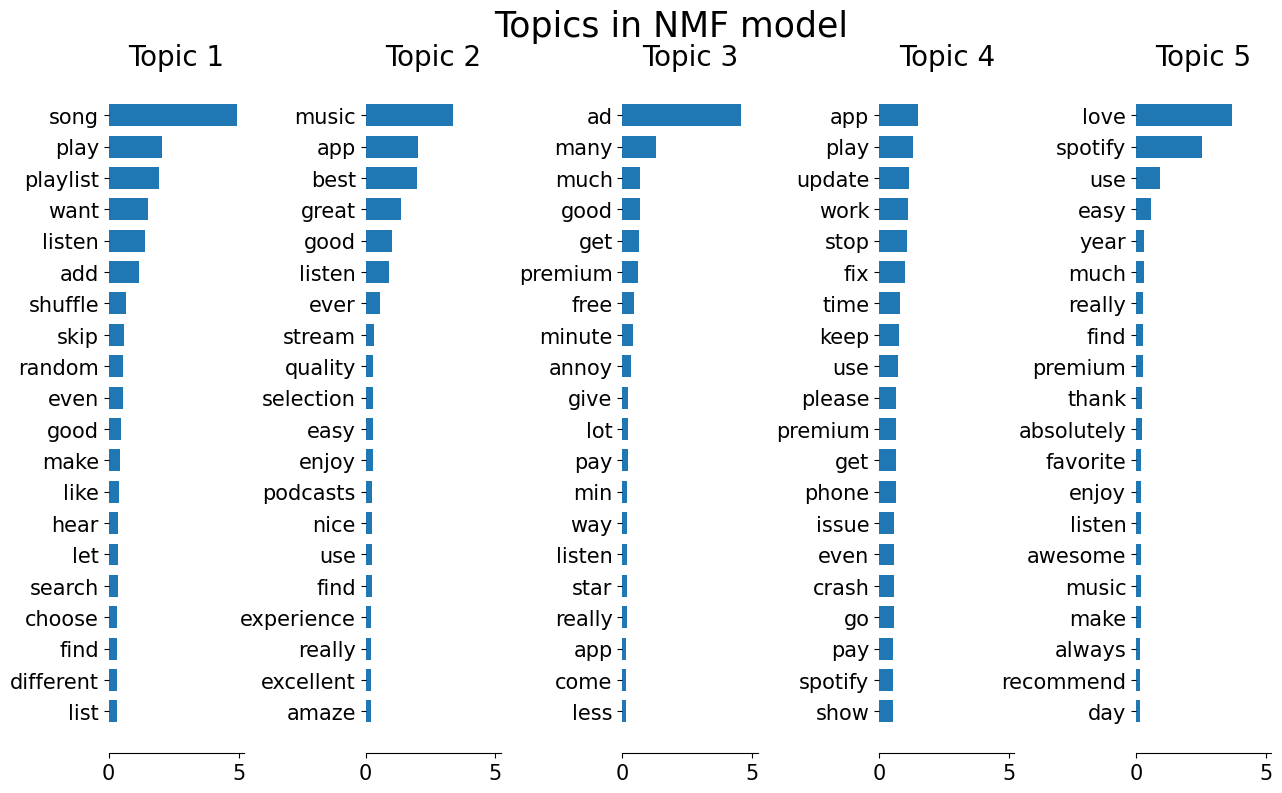

In [138]:
topic_word_plot()